In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 7776 files belonging to 42 classes.
Found 1039 files belonging to 42 classes.
Found 1024 files belonging to 42 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1955 - loss: 3.2031

243/243 ━━━━━━━━━━━━━━━━━━━━ 1915s 8s/step - accuracy: 0.1961 - loss: 3.2001 - val_accuracy: 0.3898 - val_loss: 2.2386
Epoch 2/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5889 - loss: 1.3563

243/243 ━━━━━━━━━━━━━━━━━━━━ 1116s 4s/step - accuracy: 0.5890 - loss: 1.3558 - val_accuracy: 0.5602 - val_loss: 1.6471
Epoch 3/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6910 - loss: 0.9909

243/243 ━━━━━━━━━━━━━━━━━━━━ 1089s 4s/step - accuracy: 0.6911 - loss: 0.9906 - val_accuracy: 0.6420 - val_loss: 1.3153
Epoch 4/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7479 - loss: 0.7901

243/243 ━━━━━━━━━━━━━━━━━━━━ 1081s 4s/step - accuracy: 0.7480 - loss: 0.7900 - val_accuracy: 0.7122 - val_loss: 1.0865
Epoch 5/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7840 - loss: 0.6782

243/243 ━━━━━━━━━━━━━━━━━━━━ 1064s 4s/step - accuracy: 0.7841 - loss: 0.6781 - val_accuracy: 0.7353 - val_loss: 1.0409
Epoch 6/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8014 - loss: 0.6063

243/243 ━━━━━━━━━━━━━━━━━━━━ 1070s 4s/step - accuracy: 0.8015 - loss: 0.6061 - val_accuracy: 0.7565 - val_loss: 1.0235
Epoch 7/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 1041s 4s/step - accuracy: 0.8317 - loss: 0.5179 - val_accuracy: 0.7151 - val_loss: 1.0949
Epoch 8/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 1015s 4s/step - accuracy: 0.8568 - loss: 0.4380 - val_accuracy: 0.7084 - val_loss: 1.1370
Epoch 9/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 996s 4s/step - accuracy: 0.8629 - loss: 0.4127 - val_accuracy: 0.7161 - val_loss: 1.1043
Epoch 10/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 980s 4s/step - accuracy: 0.8718 - loss: 0.3825 - val_accuracy: 0.7132 - val_loss: 1.2379
Epoch 11/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 1006s 4s/step - accuracy: 0.8810 - loss: 0.3379 - val_accuracy: 0.7353 - val_loss: 1.1796
Epoch 12/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 980s 4s/step - accuracy: 0.9002 - loss: 0.2849 - val_accuracy: 0.7295 - val_loss: 1.1583
Epoch 13/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 1012s 4s/step - accuracy: 0.8994 - loss: 0.2772 - val_accura


Classification Report:
                           precision    recall  f1-score   support

              Ayam Crispy       1.00      0.58      0.73        26
               Ayam Kecap       0.65      0.92      0.76        24
           Ayam Serundeng       0.77      0.91      0.83        22
                    Bakso       1.00      0.79      0.88        24
                 Brownies       1.00      0.73      0.84        26
               Bubur Ayam       0.64      0.88      0.74        24
                   Capcay       0.80      1.00      0.89        20
               Cumi Bakar       0.84      0.81      0.82        26
               Cumi Hitam       1.00      0.72      0.84        25
                Cumi Rica       0.70      0.70      0.70        27
              Dimsum Ikan       0.95      1.00      0.98        21
              Garang Asem       0.86      0.82      0.84        22
               Ikan Bakar       0.73      0.67      0.70        24
              Ikan Goreng       0.42 

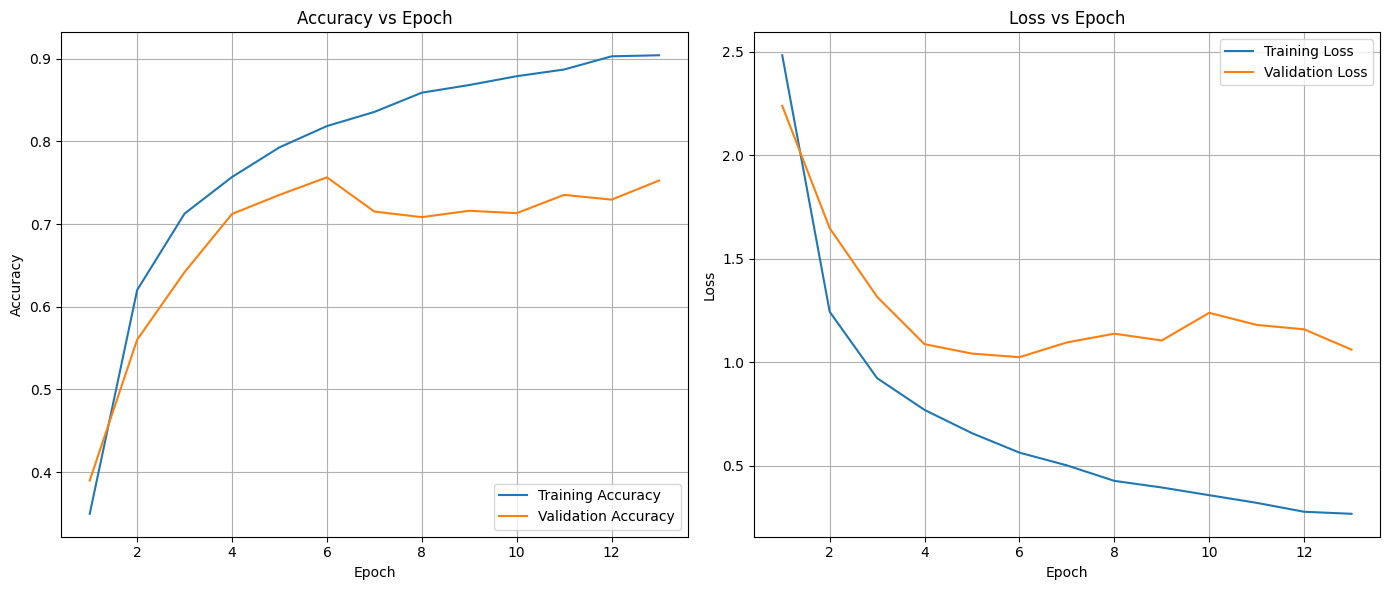

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report

# === SET RANDOM SEED FOR REPRODUCIBILITY ===
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# === CONFIG ===
#Number of sample processed before updating model weight
BATCH_SIZE = 32 #memory efficient, fast load
IMG_SIZE = (224, 224) #used by model MobileNetV2(compatible with dataset)
DATA_DIR = "/content/drive/MyDrive/dataset_gambar"
EPOCHS = 25

# === LOAD DATASETS ===
train_ds = image_dataset_from_directory(
    os.path.join(DATA_DIR, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True, #to mix different classes in 1 batch to improve learning
seed=SEED
)

val_ds = image_dataset_from_directory(
    os.path.join(DATA_DIR, "valid"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False #to have a fair evaluation
)

test_ds = image_dataset_from_directory(
    os.path.join(DATA_DIR, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False #to have a fair evaluation
)

class_names = train_ds.class_names
num_classes = len(class_names) #all classes count

# === DATA AUGMENTATION + PREPROCESSING ===
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),#beacuse some food have different orientations, vertical bad because food could be distorted
    layers.RandomRotation(0.2),# to help the model to recognized food if taken in different angle
    layers.RandomZoom(0.2), #becuase every photo could be taken in different distance
    layers.RandomContrast(0.2), # to improve photo taken in the dark room or bright room

])

def preprocess_and_augment(image, label):
    image = data_augmentation(image)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

def preprocess_only(image, label):
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

train_ds = train_ds.map(preprocess_and_augment)
val_ds = val_ds.map(preprocess_only)
test_ds = test_ds.map(preprocess_only)

# PREFETCHING
AUTOTUNE = tf.data.AUTOTUNE #prefetch to prepare next batch before current batch finished
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)#autotune to automatically choose the best buffer size
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# === MODEL SETUP ===
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),# why use mobilenet because mobilenet lightweight, efficient,
                                               include_top=False, #good accuracy, and effective for classfication
                                               weights='imagenet')
base_model.trainable = True  # to improve accuracy, by updating weights in base model

# Freeze first 100 layers (adjust if needed)
for layer in base_model.layers[:100]: #early layer learn general feature thats already pretrained
    layer.trainable = False #

model = models.Sequential([ #because sequential compatible with image classification
    base_model,
    layers.GlobalAveragePooling2D(), #convert 3d feature into 1d vector by avergaing all values in each vhannel: prevents overfitting
    layers.Dropout(0.3),  # to regularizes the model: make it less overfitting
    layers.Dense(num_classes, activation='softmax') #final layer: for output class probability
])

# === LEARNING RATE SCHEDULE AND OPTIMIZER ===
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay( # to reduce learning rate as training goes on
    initial_learning_rate=1e-4, # small start learning rate good for fine tuning
    decay_steps=6000, #every 6000 training step learning rate is updated
    decay_rate=0.96, # learning rate multiplied by 0.96 every update
    staircase=True # for the learning drop instantly because its more simple and predictable
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)#beacuse adam had more stability of memoentum and adaptive learning rates

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy', #measure how wrong the model predict, why use because work effeicntly with int
    metrics=['accuracy'] #calculate and report accuracy
)
# === CALLBACKS ===
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True) #if models stop improving 7 times auto stop # ideal 5 -10 in the middle 7
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True) # to save model

# === TRAIN ===
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

# === EVALUATE ON TEST SET ===
print("\nEvaluating on test set:")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# === PREDICTIONS & CLASSIFICATION REPORT ===
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1)) # to find index with highest value

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# === SAVE FINAL MODEL ===
model.save("final_model.h5")
print("Model saved as 'final_model.h5'")

# === PLOT TRAINING HISTORY ===


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()
